## Text classification on LeMonde2003 Dataset

In this notebook, we 
apply classification algorithms to newspaper articles published in 2003 in *Le Monde*. 

The data are here : https://cloud.teklia.com/index.php/s/isNwnwA7a7AWst6/download/LeMonde2003_9classes.csv.gz

Download it into the data directory : 

```
wget https://cloud.teklia.com/index.php/s/isNwnwA7a7AWst6/download/LeMonde2003_9classes.csv.gz
```

Or you can download the file directly from the URL in pandas with `pd.read_csv(url)`.`

These articles concern different subjects but we will consider only articles related to the following subjects : entreprises (ENT), international (INT), arts (ART), société (SOC), France (FRA), sports (SPO), livres (LIV), télévision (TEL) and the font page articles (UNE).


> * Load the CSV file `LeMonde2003_9classes.csv.gz` containing the articles using pandas [pd.read_csv](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html). How many articles do you have ? 
> * Plot the frequency histogram of the categories using seaborn [countplot](https://seaborn.pydata.org/tutorial/categorical.html) : `sns.countplot(data=df,y='category')`
> * Display the text of some of the article with the corresponding class using pandas [sample](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sample.html)
> * Using the [WordCloud library](https://amueller.github.io/word_cloud/index.html), display a word cloud for the most frequent classes. You can remove the stop words using the `stopwords` option, using the list of stop words in French in `data/stop_word_fr.txt` or from the URL https://cloud.teklia.com/index.php/s/3mwZfSre4PmJcdb/download/stop_word_fr.txt



In [49]:
import pandas as pd

# load dataframe from CSV file
url = 'https://cloud.teklia.com/index.php/s/isNwnwA7a7AWst6/download/LeMonde2003_9classes.csv.gz'
data = pd.read_csv(url)


In [50]:
data 

,text,category
0,"a la boutique du fulham fc nichée au dernier étage du grand magasin harrods le portrait de mohammed al-fayed est omniprésent le visage souriant du propriétaire égyptien du prestigieux établissement de knightsbridge comme du club anglais est à l'affiche partout sur les calendriers les maillots de corps les publicités en revanche pas la moindre trace de jean tigana lâché par le magnat égyptien ses jours paraissaient comptés depuis quelque temps déjà l'annonce mercredi 26 mars du non- renouvellement de son contrat à la fin de la présente saison n'aura donc surpris personne en mai prochain jean tigana quittera fulham depuis mai 2000 date d'arrivée dans le club qu'il avait contribué à remonter parmi l'élite en mai 2000 l'entraîneur n'a cessé de voir son image se dégrader eclaboussé notamment par le scandale du transfert de steve marlet a l'été 2001 tigana obtient l'autorisation d'acheter un attaquant supplémentaire pour renforcer le secteur offensif de son équipe son choix se porte sur steve marlet de l'olympique lyonnais pour 11,5 millions de livres 16,95 millions d'euros très vite devant les prestations en dents de scie du français la presse s'interroge sur le prix élevé payé par tigana fayed lance sa propre enquête et découvre que l'agent chargé du dossier a agi à la fois pour lyon et fulham ce qu'interdit la loi anglaise le club londonien décide alors de retenir le dernier tiers du transfert et la prime de l'agent le dossier est transmis à la fédération internationale fifa tigana a beau clamer son innocence les soupçons pèsent sur lui en raison de son passé d'agent pour superviser les transferts fayed nomme alors l'italien franco baresi comme directeur du club le 1er juin inquiet de cette concurrence tigana se débarrasse rapidement de l'ancienne star du milan ac qui dégoûté par ces intrigues claque la porte après deux mois fayed a peu apprécié ce camouflet et ne cesse depuis de tailler des croupières à son manager tigana est également dans le collimateur de la presse pour l'achat onéreux du défenseur marocain abdeslam ouaddou le président fondateur de harrods holdings se serait bien passé de la contre-publicité de l'affaire marlet fayed serait actuellement à court d'argent l'abandon de son projet d'inscription partielle de harrods holdings à la bourse de new york l'atteste tout comme le report aux calendes grecques du projet de construction d'un stade ultra-moderne de 28 000 places en remplacement de craven cottage artifices comptables depuis deux saisons les noir et blanc du fulham fc sont ainsi contraints de disputer leurs rencontres à domicile à loftus road fief habituel des queen 's park rangers dans l'ouest londonien le club qui a perdu 35,37 millions d'euros en 2002 est surendetté en raison des 88,43 millions d'euros au minimum engloutis par fayed depuis 1997 les banquiers hésitent à accorder une rallonge au milliardaire en raison de l'incroyable complexité financière de son groupe la city soupçonne fayed d'utiliser le club pour dissimuler des artifices comptables et des opérations financières obscures visant à brouiller les pistes le récent remplacement des commissaires aux comptes de harrods holdings a renforcé les craintes des créanciers malgré les millions dépensés fulham fait pâle figure par rapport à ses rivaux londoniens arsenal chelsea charlton ou encore tottenham mais ce que reproche surtout fayed à son entraîneur au bout du compte c'est de ne pas lui avoir apporté cette respectabilité à laquelle il aspire depuis le refus des autorités de lui accorder la nationalité britannique",SPO
1,pour la plupart de ceux qui n'y vivent pas la vie dans les cités se résume trop souvent aux images de violence qu'en montrent les journaux télévisés afin de casser cette vision caricaturale l'équipe de c'est pas sorcier le magazine de vulgarisation scientifique de france 3 destiné aux enfants a fait une halte à la courneuve une cité de la banlieue parisienne située à 3 kilomètres à peine de la capitale a l'aide de 

In [51]:
import seaborn as sns
%matplotlib inline

# Plot the statistics of category
category = data['category']

category_stats = data["category"].value_counts()  # Counts of unique categories
category_percentage = data["category"].value_counts(normalize=True) * 100  # Percentage distribution

print("Category Counts:\n", category_stats)
print("\nCategory Percentage:\n", category_percentage)

Category Counts:
 category
INT    7328
ENT    6251
ART    4552
SOC    3755
FRA    3616
SPO    2608
UNE    2055
Name: count, dtype: int64

Category Percentage:
 category
INT    24.293055
ENT    20.722692
ART    15.090336
SOC    12.448202
FRA    11.987403
SPO     8.645782
UNE     6.812531
Name: proportion, dtype: float64


In [52]:
# Print examples of the articles
pd.set_option('display.max_colwidth', None)
# YOUR CODE HERE
# Set option to display full text
print(data)


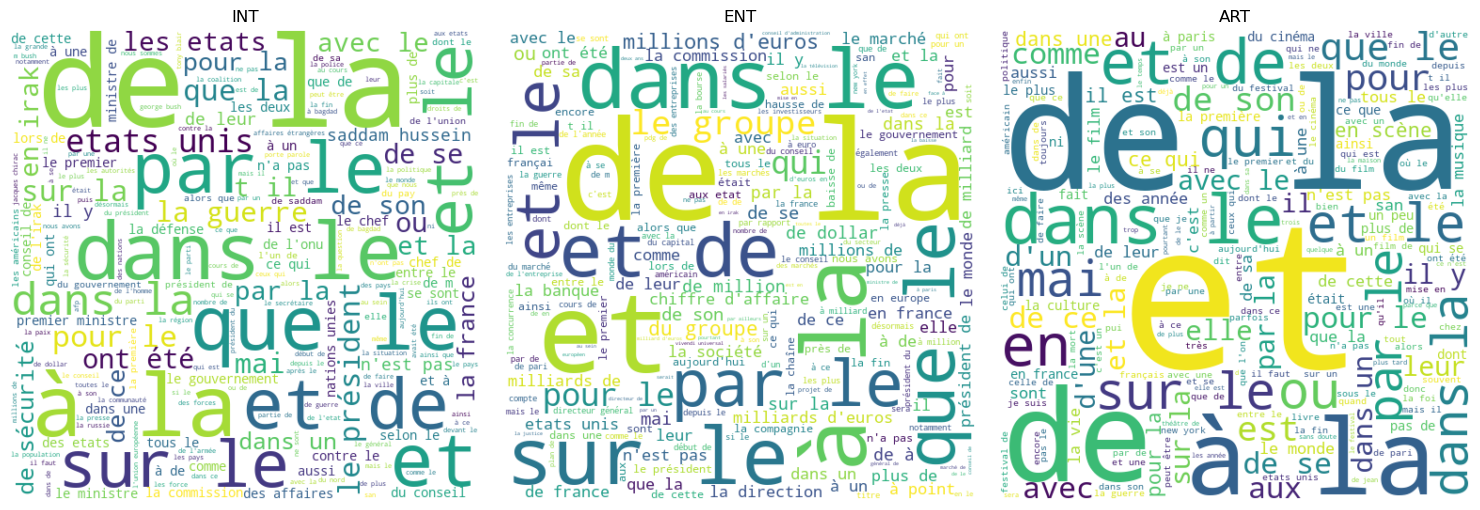

In [53]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


top_categories = data["category"].value_counts().head(3).index  # Change the number as needed

# Create word clouds for each top category
fig, axes = plt.subplots(1, len(top_categories), figsize=(15, 5))

for i, category in enumerate(top_categories):
    # Filter text data for the category
    text_data = " ".join(data[data["category"] == category]["text"].dropna())  # Adjust column name

    # Generate the word cloud
    wordcloud = WordCloud(width=500, height=500, background_color="white").generate(text_data)

    # Plot word cloud
    axes[i].imshow(wordcloud, interpolation="bilinear")
    axes[i].axis("off")
    axes[i].set_title(category)

# Show the word clouds
plt.tight_layout()
plt.show()

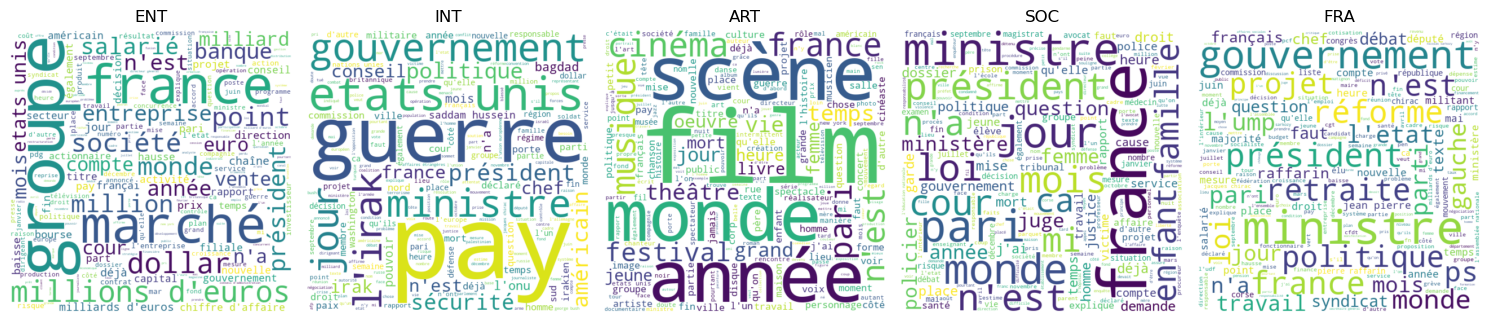

In [54]:

from wordcloud import WordCloud
STOPWORDS = [x.strip() for x in open('data/stop_word_fr.txt').readlines()]

# plot a word cloud for each category
top_categories =  ['ENT', 'INT',  'ART', 'SOC', 'FRA']
custom_stopwords = set(STOPWORDS)
fig, axes = plt.subplots(1, len(top_categories), figsize=(15, 5))

for i, category in enumerate(top_categories):
    # Filter text data for the category
    text_data = " ".join(data[data["category"] == category]["text"].dropna())  # Adjust column name

    # Generate the word cloud
    wordcloud = WordCloud(width=500, height=500, background_color="white", stopwords=custom_stopwords).generate(text_data)
    # Plot word cloud
    axes[i].imshow(wordcloud, interpolation="bilinear")
    axes[i].axis("off")
    axes[i].set_title(category)

# Show the word clouds
plt.tight_layout()
plt.show()

## Bag-of-word representation

In order to apply machine learning algorithms to text, documents must be transformed into vectors. The most simple and standard way to transform a document into a vector is the *bag-of-word* encoding.

The idea is very simple : 

1. define the set of all the possible words that can appear in a document; denote its size by `max_features`.
2. for each document,  encode it with a vector of size `max_features`, with the value of the ith component of the vector equal to the number of time the ith word appears in the document.

See [the wikipedia article on Bag-of-word](https://en.wikipedia.org/wiki/Bag-of-words_model) for an example.

Scikit-learn proposes different methods to encode text into vectors : [CountVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) and [TfidfTransformer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfTransformer.html).

The encoder must first be trained on the train set and applied to the different sets, for example with the 200  words : 

	from sklearn.feature_extraction.text import CountVectorizer
	vectorizer = CountVectorizer(max_features=200)
    vectorizer.fit(X_train)
    X_train_counts = vectorizer.transform(X_train)
    X_test_counts = vectorizer.transform(X_test)
        
**Question**:

> * Split the dataset LeMonde2003 into train set (80%), dev set (10%)  and test set (10%) using scikit-learn [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)
> * For each set, transform the text of the articles into vectors using the `CountVectorizer`, considering the 1000 most frequent words. 
> * Train a naive bayes classifier on the data. 
> * Evaluate the classification accuracy on the train, dev and test sets using the [score](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html#sklearn.naive_bayes.MultinomialNB.score) method. 

> ***Important*** : the test set must not be used during the training phase, and learning the vector representation of the words is part of the training. The dev set should be an evaluation of the test set.



In [61]:
from sklearn.model_selection import train_test_split
X = data['text']  # Drop the target column, keeping features
y = data["category"]  # Define the target column

# Split into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [62]:
from sklearn.feature_extraction.text import CountVectorizer

# Create the CountVectorizer object
vectorizer = CountVectorizer(max_features=200)

# Fit on training data (learn vocabulary)
vectorizer.fit(X_train)

# Transform both train and test data
X_train_vectors = vectorizer.transform(X_train)
X_test_vectors = vectorizer.transform(X_test)


In [63]:
print(X_test_vectors)

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 344379 stored elements and shape (6033, 200)>
  Coords	Values
  (0, 3)	1
  (0, 4)	1
  (0, 8)	2
  (0, 15)	4
  (0, 17)	2
  (0, 20)	3
  (0, 21)	2
  (0, 24)	1
  (0, 25)	4
  (0, 26)	2
  (0, 27)	3
  (0, 28)	1
  (0, 29)	5
  (0, 43)	1
  (0, 47)	1
  (0, 48)	7
  (0, 49)	27
  (0, 50)	2
  (0, 51)	4
  (0, 53)	2
  (0, 58)	14
  (0, 59)	1
  (0, 60)	1
  (0, 64)	8
  (0, 66)	1
  :	:
  (6032, 48)	1
  (6032, 49)	4
  (6032, 52)	1
  (6032, 58)	1
  (6032, 60)	1
  (6032, 64)	1
  (6032, 68)	1
  (6032, 72)	1
  (6032, 86)	1
  (6032, 98)	1
  (6032, 103)	3
  (6032, 110)	1
  (6032, 119)	1
  (6032, 139)	3
  (6032, 151)	1
  (6032, 162)	2
  (6032, 163)	1
  (6032, 165)	1
  (6032, 167)	2
  (6032, 176)	1
  (6032, 188)	1
  (6032, 189)	1
  (6032, 192)	1
  (6032, 198)	2
  (6032, 199)	1


In [64]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Créer le classificateur Naive Bayes
model = MultinomialNB()

# Entraîner le modèle
model.fit(X_train_vectors, y_train)

# Prédictions sur les données de test
y_pred = model.predict(X_test_vectors)

# Évaluer les performances
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Afficher un rapport de classification détaillé
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Afficher la matrice de confusion
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))



Accuracy: 0.5504724017901541

Classification Report:
              precision    recall  f1-score   support

         ART       0.67      0.67      0.67       919
         ENT       0.53      0.72      0.61      1201
         FRA       0.49      0.53      0.51       737
         INT       0.71      0.58      0.64      1491
         SOC       0.43      0.43      0.43       741
         SPO       0.56      0.41      0.47       548
         UNE       0.15      0.13      0.14       396

    accuracy                           0.55      6033
   macro avg       0.51      0.49      0.50      6033
weighted avg       0.56      0.55      0.55      6033


Confusion Matrix:
[[613 125  33  28  46  43  31]
 [ 35 863  70  86  68  26  53]
 [ 29 111 388  51  99  24  35]
 [ 72 141 112 861 145  18 142]
 [ 53 127 132  35 320  44  30]
 [ 38 199   9  34  36 224   8]
 [ 73  63  48 112  27  21  52]]


## TF-IDF representation

The `CountVectorizer` encodes the text using the raw frequencies of the words. However, words that are very frequent and appear in all the documents will have a strong weight whereas they are not discriminative. The *Term-Frequency Inverse-Document-Frequency* weighting scheme take into accound the number of documents in which a given word occurs. A word that appear in many document will have less weight. See [the wikipedia page](https://en.wikipedia.org/wiki/Tf%E2%80%93idf) for more details.

With scikit-learn, the `TfidfTransformer` is applied after the `CountVectorizer` :

	from sklearn.feature_extraction.text import TfidfTransformer
	tf_transformer = TfidfTransformer().fit(X_train_counts)
 	X_train_tf = tf_transformer.transform(X_train_counts)
	X_test_tf = tf_transformer.transform(X_test_counts)
	
**Question**:

> * Use the TF-IDF representation to train a Multinomial Naive Bayes classifier. Report your best test error rate and the error rates for all the configurations tested.

In [65]:
from sklearn.feature_extraction.text import TfidfTransformer
# YOUR CODE HERE

vectorizer = CountVectorizer(max_features=200)  
X_train_counts = vectorizer.fit_transform(X_train)
X_test_counts = vectorizer.transform(X_test)

# 2. Appliquez TF-IDF sur les comptages de mots
tf_transformer = TfidfTransformer().fit(X_train_counts)
X_train_tf = tf_transformer.transform(X_train_counts)
X_test_tf = tf_transformer.transform(X_test_counts)

# 3. Créez un modèle Multinomial Naive Bayes
model = MultinomialNB()

# 4. Entraînez le modèle avec la représentation TF-IDF des données d'entraînement
model.fit(X_train_tf, y_train)

# 5. Faites des prédictions sur les données de test
y_pred = model.predict(X_test_tf)

# 6. Calculer l'erreur de test (taux d'erreur)
accuracy = accuracy_score(y_test, y_pred)
error_rate = 1 - accuracy
print(f"Test error rate: {error_rate}")

# 7. Afficher un rapport détaillé sur les performances du modèle
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# 8. Afficher la matrice de confusion
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Test error rate: 0.49958561246477706

Classification Report:
              precision    recall  f1-score   support

         ART       0.60      0.65      0.62       919
         ENT       0.51      0.68      0.59      1201
         FRA       0.64      0.14      0.23       737
         INT       0.44      0.90      0.59      1491
         SOC       0.58      0.14      0.23       741
         SPO       0.88      0.09      0.16       548
         UNE       0.00      0.00      0.00       396

    accuracy                           0.50      6033
   macro avg       0.52      0.37      0.35      6033
weighted avg       0.53      0.50      0.43      6033


Confusion Matrix:
[[ 598  118    4  194    4    1    0]
 [  44  820    6  321    9    1    0]
 [  59  137  101  411   29    0    0]
 [  36   91    2 1347   15    0    0]
 [  90  151   34  360  104    2    0]
 [ 113  215    3  156   12   49    0]
 [  63   64    7  254    5    3    0]]


/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## Error analysis

The classification error rate give an evaluation of the performance for all the classes. But since the classes are not equally distributed, they may not be equally well modelized. In order to get a better idea of the performance of the classifier, detailed metrics must be used : 

* [metrics.classification_report](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) provides a detailed analysis per class : the precision (amongst all the example classified as class X, how many are really from the classX) and the recall (amongst all the example that are from the class X, how many are classified as class X) and the F-Score which is as a weighted harmonic mean of the precision and recall.
* [metrics.confusion_matrix](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) which give the confusions between the classes. It can be displayed in color with [plot_confusion_matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html#sklearn.metrics.plot_confusion_matrix).

**Question**:

> * Report the `classification_report` for your  classifier. Which classes have the best scores ? Why ?
> * Report the `confusion_matrix` for your  classifier. Which classes are the most confused ? Why ?



Classification Report:
              precision    recall  f1-score   support

         ART       0.60      0.65      0.62       919
         ENT       0.51      0.68      0.59      1201
         FRA       0.64      0.14      0.23       737
         INT       0.44      0.90      0.59      1491
         SOC       0.58      0.14      0.23       741
         SPO       0.88      0.09      0.16       548
         UNE       0.00      0.00      0.00       396

    accuracy                           0.50      6033
   macro avg       0.52      0.37      0.35      6033
weighted avg       0.53      0.50      0.43      6033


Confusion Matrix:
[[ 598  118    4  194    4    1    0]
 [  44  820    6  321    9    1    0]
 [  59  137  101  411   29    0    0]
 [  36   91    2 1347   15    0    0]
 [  90  151   34  360  104    2    0]
 [ 113  215    3  156   12   49    0]
 [  63   64    7  254    5    3    0]]


/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


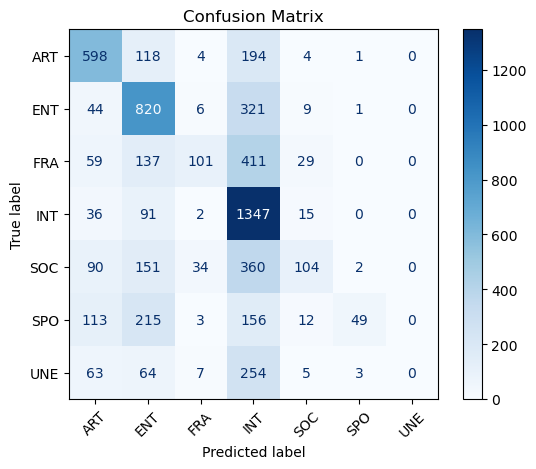

In [67]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Prédictions sur les données de test
y_pred = model.predict(X_test_tf)

# 1. Afficher le rapport de classification
print("\nClassification Report:")
report = classification_report(y_test, y_pred)
print(report)

# 2. Afficher la matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred)

print("\nConfusion Matrix:")
print(conf_matrix)

# 3. Afficher la matrice de confusion sous forme graphique
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues, xticks_rotation=45)
plt.title("Confusion Matrix")
plt.show()



**Answer** : The class with the best score is ART and the most confused classes are ART, INT and ENT

## Data re-configuration
After the error analysis, we came to the conclusion that one of the class can not be distinguised from the others. There is no use trying to solve an impossible problem.

**Questions**:

> * Remove the class `UNE` from the original dataset and merge the semantically close classes 'FRANCE' and 'SOCIETE'
> * Plot the class statitics with seaborn
> * Create new splits
> * Retrain a NaiveBayes classifier using [TfidfVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) with the 1000 most frequent words.

category
FRA_SOC    7371
INT        7328
ENT        6251
ART        4552
SPO        2608
Name: count, dtype: int64


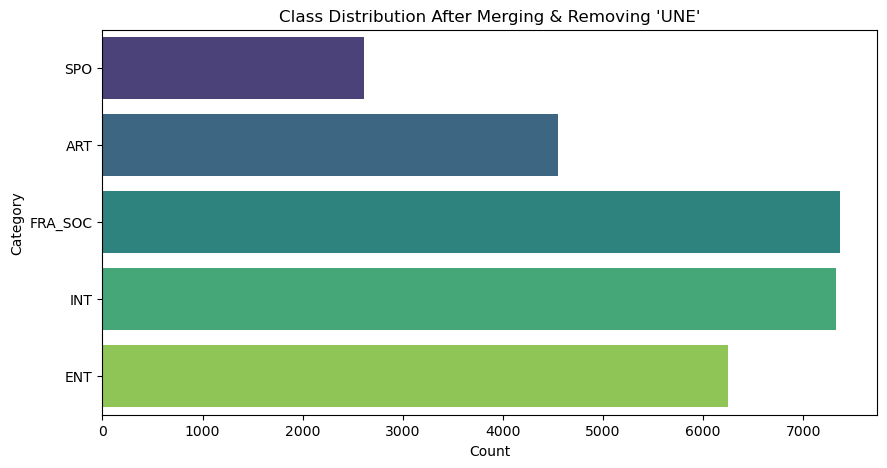


Classification Report:
              precision    recall  f1-score   support

         ART       0.84      0.85      0.84       917
         ENT       0.83      0.81      0.82      1251
     FRA_SOC       0.76      0.88      0.82      1456
         INT       0.88      0.84      0.86      1515
         SPO       0.97      0.70      0.81       483

    accuracy                           0.83      5622
   macro avg       0.86      0.81      0.83      5622
weighted avg       0.84      0.83      0.83      5622



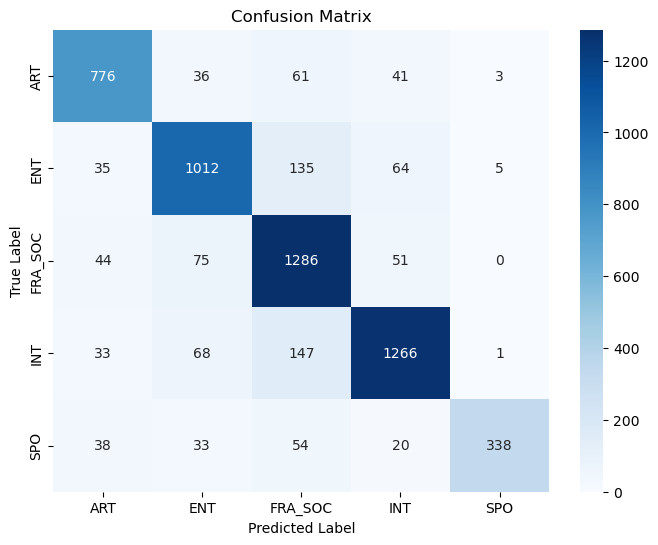

In [72]:
from sklearn.feature_extraction.text import TfidfVectorizer
# YOUR CODE HERE

# Filter out the UNE class
new_data = data[data["category"] != "UNE"]

new_data = new_data.copy()  # Ensures modifications happen on a new copy
new_data.loc[:, "category"] = new_data["category"].replace({"FRA": "FRA_SOC", "SOC": "FRA_SOC"})

# Merge 'FRANCE' and 'SOCIETE' into a new class 'FRANCE_SOCIETE'
new_data["category"] = new_data["category"].replace({"FRA": "FRA_SOC", "SOC": "FRA_SOC"})

# Check new class distribution
print(new_data["category"].value_counts())

# Plot the updated class distribution & Plot the statistics of classes
plt.figure(figsize=(10, 5))
sns.countplot(data=new_data, y="category", hue="category", palette="viridis", legend=False)
plt.title("Class Distribution After Merging & Removing 'UNE'")
plt.xlabel("Count")
plt.ylabel("Category")
plt.show()

# Splitting dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    new_data["text"], new_data["category"], test_size=0.2, random_state=42)


# Apply TfidfVectorizer
# Initialize TfidfVectorizer with 1000 most frequent words
vectorizer = TfidfVectorizer(max_features=1000, stop_words="english")

# Fit and transform the data
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Train a Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_tfidf, y_train)

# Predict on the test set
y_pred = nb_classifier.predict(X_test_tfidf)

# Evaluate the model
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=nb_classifier.classes_, yticklabels=nb_classifier.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()






## What about the LLMs?

**You must write the answer to this question in a notebook hosted in your github account and give access to your supervisor.**

LLMs are reputed to have revolutionised automatic language processing. Since the introduction of BERT-type models, all language processing applications have been based on LLMs, of varying degrees of sophistication and size. These models are trained on multiple tasks and are therefore capable of performing new tasks without learning, simply from a prompt. This is known as "zero-shot learning" because there is no learning phase as such. We are going to test these models on our classification task.

Huggingface is a Franco-American company that develops tools for building applications based on Deep Learning. In particular, it hosts the huggingface.co portal, which contains numerous Deep Learning models. These models can be used very easily thanks to the [Transformer] library (https://huggingface.co/docs/transformers/quicktour) developed by HuggingFace.

Using a transform model in zero-shot learning with HuggingFace is very simple: [see documentation](https://huggingface.co/tasks/zero-shot-classification)

However, you need to choose a suitable model from the list of models compatible with Zero-Shot classification. HuggingFace offers [numerous models](https://huggingface.co/models?pipeline_tag=zero-shot-classification). 

The classes proposed to the model must also provide sufficient semantic information for the model to understand them.

**Question**:

* Write a code to classify an example of text from an article in Le Monde using a model transformed using zero-sot learning with the HuggingFace library.
* choose a model and explain your choice
* choose a formulation for the classes to be predicted
* show that the model predicts a class for the text of the article (correct or incorrect, analyse the results)
* evaluate the performance of your model on 100 articles (a test set).
* note model sizes, processing times and classification results


Notes :
* make sure that you use the correct Tokenizer when using a model 
* start testing with a small number of articles and the first 100's of characters for faster experiments.

In [76]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification


model_name = "cmarkea/distilcamembert-base-nli"
model = AutoModelForSequenceClassification.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name)

classifier = pipeline(
    task='zero-shot-classification',
    model="cmarkea/distilcamembert-base-nli",
    tokenizer="cmarkea/distilcamembert-base-nli"
)
classifier("Nous sommes très heureux de vous présenter la bibliothèque 🤗 Transformers.")



ImportError: 
AutoModelForSequenceClassification requires the PyTorch library but it was not found in your environment. Checkout the instructions on the
installation page: https://pytorch.org/get-started/locally/ and follow the ones that match your environment.
Please note that you may need to restart your runtime after installation.
